## Analysis of dataset

Make some of the main plots?


### Setup

First load data and infer networks, and import GENIE3 network (previously inferred using Python; made undirected by removing second occurence of any edge and keeping first only). Correlation are unsigned.

In [1]:
using NetworkInference, Assortativity, Plots, Colors

┌ Info: Recompiling stale cache file C:\Users\leo-d\.julia\compiled\v1.2\NetworkInference\WOYob.ji for NetworkInference [6b44d3db-2bc5-5ac3-b70f-26aa69b1b11b]
└ @ Base loading.jl:1240
┌ Warning: Package NetworkInference does not have EmpiricalBayes in its dependencies:
│ - If you have NetworkInference checked out for development and have
│   added EmpiricalBayes as a dependency but haven't updated your primary
│   environment's manifest file, try `Pkg.resolve()`.
│ - Otherwise you may need to report an issue with NetworkInference
└ Loading EmpiricalBayes into NetworkInference from project dependency, future warnings for NetworkInference are suppressed.
┌ Info: Recompiling stale cache file C:\Users\leo-d\.julia\compiled\v1.2\Assortativity\WVEyd.ji for Assortativity [ef586a44-145f-508a-9374-89eabc5131cc]
└ @ Base loading.jl:1240


In [22]:
datadir = "data/"
data_filename = "data.csv"
groups_filename = "groups.tsv"
nodes, expression_values = get_nodes(datadir * data_filename, delim = ',', get_values = true)
genes_to_groups = get_labels_to_groups(nodes, datadir * groups_filename)
groups_to_indices = get_groups_to_indices(genes_to_groups)
Pearson_net = InferredNetwork(CorrelationNetworkInference("Pearson", false, expression_values), nodes)
Spearman_net = InferredNetwork(CorrelationNetworkInference("Spearman", false, expression_values), nodes)
MI_net = InferredNetwork(MINetworkInference(), nodes)
CLR_net = InferredNetwork(CLRNetworkInference(), nodes)
PUC_net = InferredNetwork(PUCNetworkInference(), nodes)
PIDC_net = InferredNetwork(PIDCNetworkInference(), nodes)
GENIE3_net = load_network(datadir * "genie3.txt", ignoreotherline = false)
total_edges = length(Pearson_net.edges)
nets = [Pearson_net Spearman_net MI_net CLR_net PUC_net PIDC_net GENIE3_net]
algorithms = ["Pearson" "Spearman" "MI" "CLR" "PUC" "PIDC" "GENIE3"]
colours = distinguishable_colors(length(algorithms))

thread = 1 warning: only found 11 / 12 columns on data row: 19. Filling remaining columns with `missing`


Then make helper functions

In [3]:
function get_degree_assortativities(network::InferredNetwork)

    total_nodes = length(network.nodes)
    assortativities = Vector{Float64}()

    for threshold in 1:Int(total_nodes*(total_nodes-1)/2)

        # make graph at current threshold, calculate assortativity & push value
        push!(assortativities, assortativity(InferredNetwork_to_LightGraph(set_threshold(network, threshold))[1]).value)

    end

    assortativities

end

get_degree_assortativities (generic function with 1 method)

In [4]:
function get_label_assortativities(network::InferredNetwork, genes_to_groups, groups_to_indices)

    total_nodes = length(network.nodes)
    assortativities = Vector{Float64}()

    for threshold in 1:Int(total_nodes*(total_nodes-1)/2)

        # make graph at current threshold
        graph, ids_to_genes = InferredNetwork_to_LightGraph(set_threshold(network, threshold))

        # calculate assortativity & push value
        push!(assortativities, assortativity(graph, genes_to_groups, groups_to_indices, ids_to_genes).value)

    end

    assortativities

end

get_label_assortativities (generic function with 1 method)

### 0. cheeky comparison regular vs second neighbour now that fixed it? and check excess degree?

In [5]:
function get_sn_degree_assortativities(network::InferredNetwork)

    total_nodes = length(network.nodes)
    assortativities = Vector{Float64}()

    for threshold in 1:Int(total_nodes*(total_nodes-1)/2)

        # make graph at current threshold, calculate assortativity & push value
        push!(assortativities, second_neighbour_assortativity(InferredNetwork_to_LightGraph(set_threshold(network, threshold))[1]).value)

    end

    assortativities

end
function get_sn_label_assortativities(network::InferredNetwork, genes_to_groups, groups_to_indices)

    total_nodes = length(network.nodes)
    assortativities = Vector{Float64}()

    for threshold in 1:Int(total_nodes*(total_nodes-1)/2)

        # make graph at current threshold
        graph, ids_to_genes = InferredNetwork_to_LightGraph(set_threshold(network, threshold))

        # calculate assortativity & push value
        push!(assortativities, second_neighbour_assortativity(graph, genes_to_groups, groups_to_indices, ids_to_genes).value)

    end

    assortativities

end

get_sn_label_assortativities (generic function with 1 method)

Degree assortativity

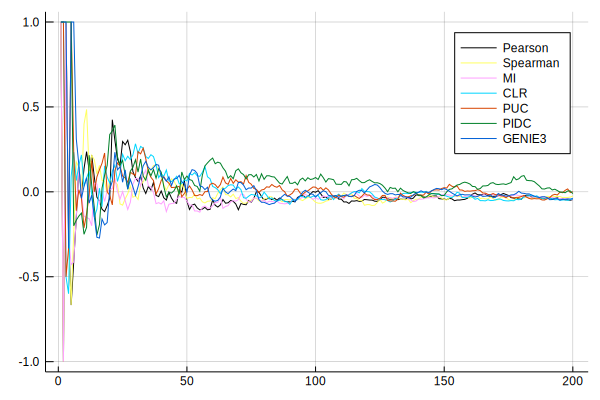

In [38]:
plot(grid = true, foreground_color_grid = :black, gridalpha = 0.3)
[plot!(collect(1:200), get_degree_assortativities(nets[i])[1:200], lab=algorithms[i], color=colours[i]) for i in 1:length(nets)]
plot!()

Second neighbour degree assortativity

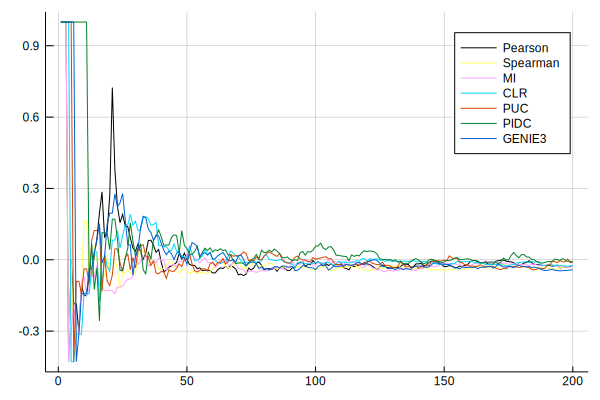

In [42]:
plot(grid = true, foreground_color_grid = :black, gridalpha = 0.3)
[plot!(collect(1:200), get_sn_degree_assortativities(nets[i])[1:200], lab=algorithms[i], color=colours[i]) for i in 1:length(nets)]
plot!()

Label assortativity

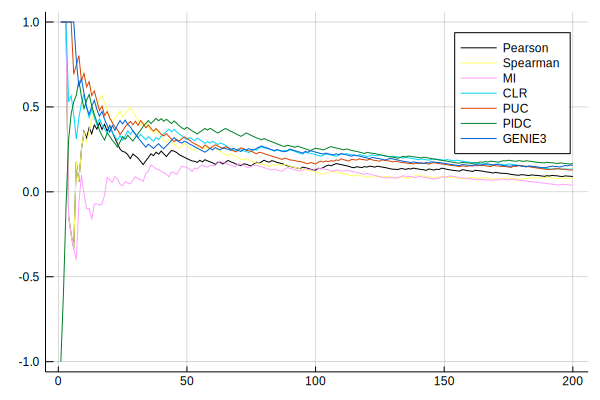

In [46]:
plot(grid = true, foreground_color_grid = :black, gridalpha = 0.3)
[plot!(collect(1:200), get_label_assortativities(nets[i], genes_to_groups, groups_to_indices)[1:200], lab=algorithms[i], color=colours[i]) for i in 1:length(nets)]
plot!()

Second neighbour label assortativity

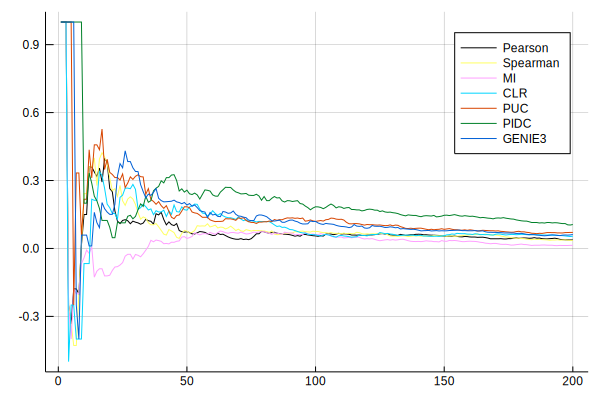

In [47]:
plot(grid = true, foreground_color_grid = :black, gridalpha = 0.3)
[plot!(collect(1:200), get_sn_label_assortativities(nets[i], genes_to_groups, groups_to_indices)[1:200], lab=algorithms[i], color=colours[i]) for i in 1:length(nets)]
plot!()

### 1. edge treshold degree assortativity for all 4 algos + genie3 + unsigned correlations

In [ ]:
get_degree_assortativities(CLR_net)
println("done")

### 2. edge treshold label assortativity for all 4 algos + genie3 + unsigned correlations

In [ ]:
get_label_assortativities(CLR_net, genes_to_groups, groups_to_indices)
println("done")

### 3. edge treshold other measures

In [8]:
println("done")

done


### 3. random + noise

In [ ]:
println("done")